In [100]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import os
import seaborn as sns

In [101]:
# Load the dataset
data = pd.read_csv('Data RSL.csv') 
data

,GOV,Level of government,TAX,Revenue category,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2004,2004,LSL,Loti,6,Millions,NaN,NaN,4001.294,NaN,NaN
1,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2005,2005,LSL,Loti,6,Millions,NaN,NaN,4437.224,NaN,NaN
2,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2006,2006,LSL,Loti,6,Millions,NaN,NaN,6344.029,NaN,NaN
3,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2007,2007,LSL,Loti,6,Millions,NaN,NaN,6775.955,NaN,NaN
4,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2008,2008,LSL,Loti,6,Millions,NaN,NaN,8280.234,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2017,2017,LSL,Loti,6,Millions,NaN,NaN,-631.698,NaN,NaN
1724,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2018,2018,LSL,Loti,6,Millions,NaN,NaN,-681.585,NaN,NaN
1725,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2019,2019,LSL,Loti,6,Millions,NaN,NaN,-866.652,NaN,NaN
1726,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2020,2020,LSL,Loti,6,Millions,NaN,NaN,-722.489,NaN,NaN


In [102]:
# Handling missing values
print("Handling missing values:")
print("Before handling missing values:")
print(data.isnull().sum())

Handling missing values:
Before handling missing values:
GOV                         0
Level of government         0
TAX                         0
Revenue category            0
YEA                         0
Year                        0
Unit Code                   0
Unit                        0
PowerCode Code              0
PowerCode                   0
Reference Period Code    1728
Reference Period         1728
Value                       0
Flag Codes               1728
Flags                    1728
dtype: int64


In [103]:
data = data[['Revenue category','Year','Value']]

In [104]:
# For categorical features, we will use mode imputation
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_3148\640183276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(data[col].mode()[0], inplace=True)


In [105]:
# like we said, for categorical features, we will use mode imputation
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("\nAfter handling missing values:")
print(data.isnull().sum()) 


After handling missing values:
Revenue category    0
Year                0
Value               0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_3148\2600097619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(data[col].mode()[0], inplace=True)


In [106]:
# Droping columns with missing values
data.dropna(axis=1, inplace=True) 

C:\Users\USER\AppData\Local\Temp\ipykernel_3148\1791389332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=1, inplace=True)


In [107]:
# After dropping columns
print("\nColumns after dropping:")
print(data.columns) 


Columns after dropping:
Index(['Revenue category', 'Year', 'Value'], dtype='object')


In [108]:
# Checking for duplicates
duplicate_rows = data[data.duplicated()]
 

In [109]:
# Printing duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.") 

Duplicate Rows:
                   Revenue category  Year     Value
18    Total tax and non-tax revenue  2004  4001.294
19    Total tax and non-tax revenue  2005  4437.224
20    Total tax and non-tax revenue  2006  6344.029
21    Total tax and non-tax revenue  2007  6775.955
22    Total tax and non-tax revenue  2008  8280.234
...                             ...   ...       ...
1723       VAT - Domestic (Refunds)  2017  -631.698
1724       VAT - Domestic (Refunds)  2018  -681.585
1725       VAT - Domestic (Refunds)  2019  -866.652
1726       VAT - Domestic (Refunds)  2020  -722.489
1727       VAT - Domestic (Refunds)  2021  -860.203

[864 rows x 3 columns]


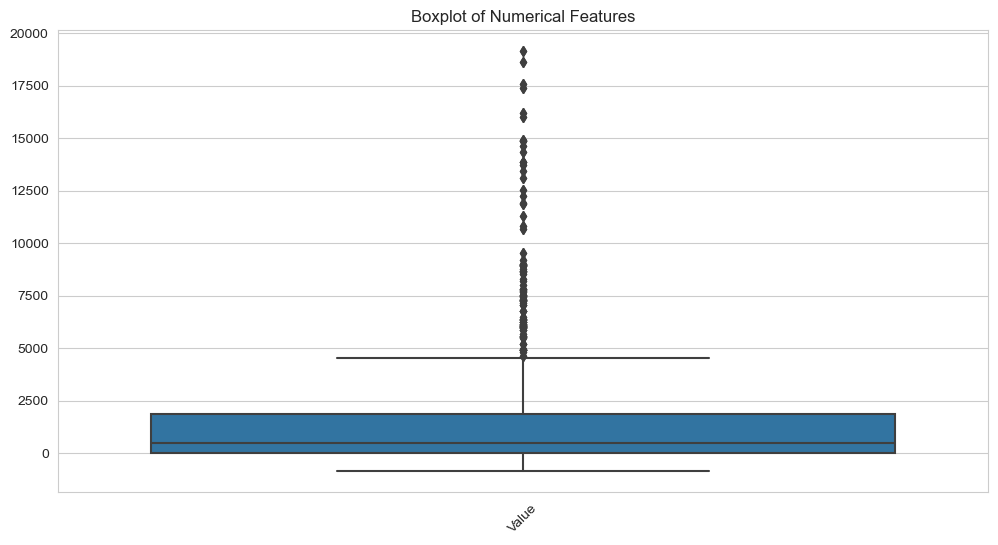

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualizing distributions and boxplots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns=['Year']))  # Excluding 'Year' column for visualization
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45) 
plt.show()

In [111]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
label_encoder = LabelEncoder()

In [112]:
# Encoding the 'Revenue category' column
data['Revenue category'] = label_encoder.fit_transform(data['Revenue category'])

C:\Users\USER\AppData\Local\Temp\ipykernel_3148\2283953794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue category'] = label_encoder.fit_transform(data['Revenue category'])


In [113]:
# Viewing the unique categories before encoding
print("Unique categories before encoding:", data['Revenue category'].unique()) 

Unique categories before encoding: [38 40  0  1  2 34 47  3  4  5 21 23  6  7  8  9 10 11 12 13 45 43 14 15
 16 17 18 19 20 41 36 27 31 32 46 25 28 30 33 26 29 35 37 39 22 24 42 44]


In [114]:
# Viewing the transformation mapping
transformation_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nTransformation mapping:")
print(transformation_mapping) 


Transformation mapping:
{'1000 Taxes on income, profits and capital gains': 0, '1100 Taxes on income, profits and capital gains of individuals': 1, '1110 On income and profits of individuals': 2, '1120 On capital gains of individuals': 3, '1200 Taxes on income, profits and capital gains of corporates': 4, '1210 On profits of corporates': 5, '1220 On capital gains of corporates': 6, '1300 Unallocable between 1100 and 1200': 7, '2000 Social security contributions (SSC)': 8, '3000 Taxes on payroll and workforce': 9, '5000 Taxes on goods and services': 10, '5100 Taxes on production, sale, transfer, etc': 11, '5110 General taxes on goods and services': 12, '5111 Value added taxes': 13, '5112 Sales tax': 14, '5113 Other (than value added and sales tax)': 15, '5120 Taxes on specific goods and services': 16, '5130 Unallocable between 5110 and 5120': 17, '5200 Taxes on use of goods and perform activities': 18, '5300 Unallocable between 5100 and 5200': 19, '6000 Taxes other than 1000, 2000, 300

In [115]:
# Viewing the first few rows of the dataset to see the encoded 'Revenue category' column
print("\nFirst few rows after encoding:")
data


First few rows after encoding:


,Revenue category,Year,Value
0,38,2004,4001.294
1,38,2005,4437.224
2,38,2006,6344.029
3,38,2007,6775.955
4,38,2008,8280.234
...,...,...,...
1723,44,2017,-631.698
1724,44,2018,-681.585
1725,44,2019,-866.652
1726,44,2020,-722.489


In [116]:

# Viewing the first few rows of the dataset to see the encoded 'Revenue category' column
print("\nFirst few rows after encoding:")
print(data.head()) 


First few rows after encoding:
   Revenue category  Year     Value
0                38  2004  4001.294
1                38  2005  4437.224
2                38  2006  6344.029
3                38  2007  6775.955
4                38  2008  8280.234


In [117]:
from scipy import stats

# Identifying numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

In [118]:
# Calculating z-scores only for numerical columns
z_scores = np.abs(stats.zscore(data[numerical_columns]))

In [119]:
# Defining a threshold for identifying outliers (e.g., z-score > 3)
threshold = 3

In [120]:
 #Finding indices of outliers
outlier_indices = np.where(z_scores > threshold)

In [121]:
# Displaying indices of outliers
print("\nIndices of outliers:")
print(outlier_indices) 


Indices of outliers:
(array([   8,    9,   10,   11,   12,   13,   14,   15,   16,   17,   26,
         27,   28,   29,   30,   31,   32,   33,   34,   35, 1096, 1097,
       1114, 1115, 1528, 1546, 1556, 1557, 1558, 1559, 1560, 1561, 1562,
       1563, 1564, 1565, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581,
       1582, 1583], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64))


In [122]:
#To ensure that data is clean, representative, and sufficient for training and evaluation
# we will remove outliers
clean_data = data.drop(outlier_indices[0]) 

In [123]:
# Checking the shape of the cleaned dataset
print("\nShape of cleaned dataset after removing outliers:", clean_data.shape) 


Shape of cleaned dataset after removing outliers: (1682, 3)


In [124]:
# Viewing first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
clean_data


First few rows of the cleaned dataset:


,Revenue category,Year,Value
0,38,2004,4001.294
1,38,2005,4437.224
2,38,2006,6344.029
3,38,2007,6775.955
4,38,2008,8280.234
...,...,...,...
1723,44,2017,-631.698
1724,44,2018,-681.585
1725,44,2019,-866.652
1726,44,2020,-722.489


In [125]:
#Viewing columns of the cleaned dataset
print("\nColumns of the cleaned dataset:")
print(clean_data.columns)  


Columns of the cleaned dataset:
Index(['Revenue category', 'Year', 'Value'], dtype='object')


In [126]:
# Statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(clean_data.describe()) 


Statistical summary of numerical columns:
       Revenue category         Year        Value
count       1682.000000  1682.000000  1682.000000
mean          23.097503  2012.376932  1306.153293
std           13.826494     5.182397  2066.243691
min            0.000000  2004.000000  -866.652000
25%           11.000000  2008.000000     0.000000
50%           23.000000  2012.000000   413.154000
75%           35.000000  2017.000000  1640.425000
max           47.000000  2021.000000  9548.196000


In [127]:
# Excluding PowerCode Code column before computing summary statistics
numerical_columns = ['Revenue category','Year', 'Value']
numerical_summary = data[numerical_columns].describe() 

In [128]:
# Printing the statistical summary of numerical columns without PowerCode Code
print("Statistical summary of numerical columns (excluding 'PowerCode Code'):")
print(numerical_summary)  


Statistical summary of numerical columns (excluding 'PowerCode Code'):
       Revenue category         Year         Value
count       1728.000000  1728.000000   1728.000000
mean          23.500000  2012.500000   1650.746302
std           13.857409     5.189629   2940.416337
min            0.000000  2004.000000   -866.652000
25%           11.750000  2008.000000      0.000000
50%           23.500000  2012.500000    464.790000
75%           35.250000  2017.000000   1857.219000
max           47.000000  2021.000000  19131.238000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


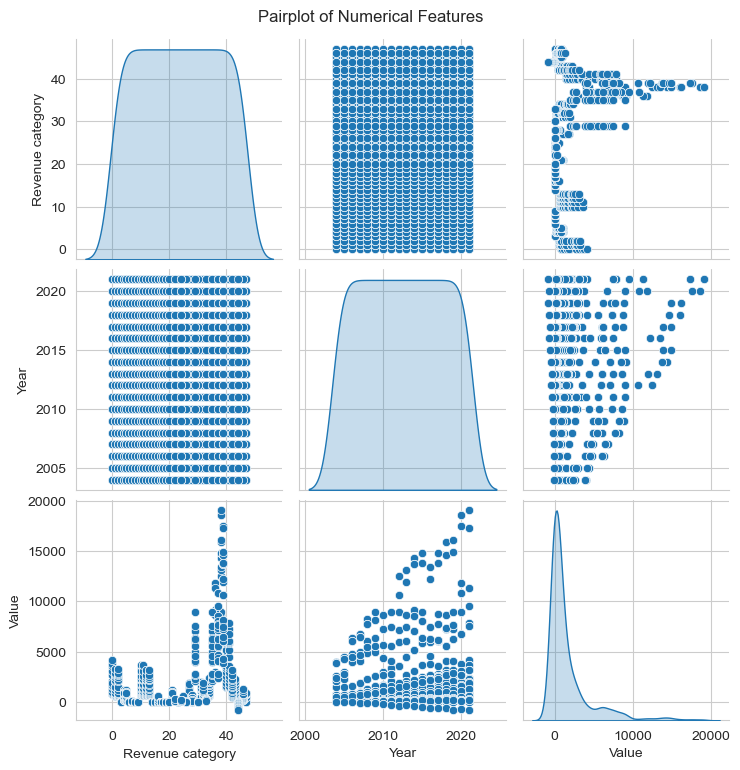

In [129]:
# Data visualization
# Set the style for seaborn
sns.set_style("whitegrid") 

# Pairplot for numerical features
sns.pairplot(data=data, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show() 

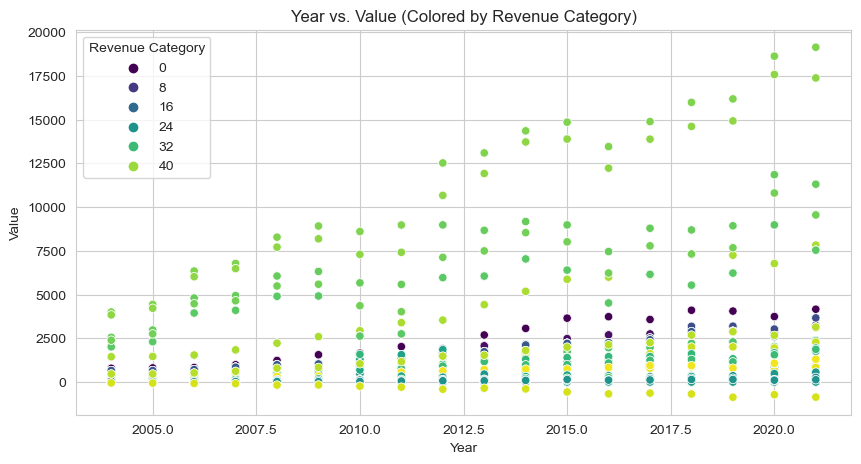

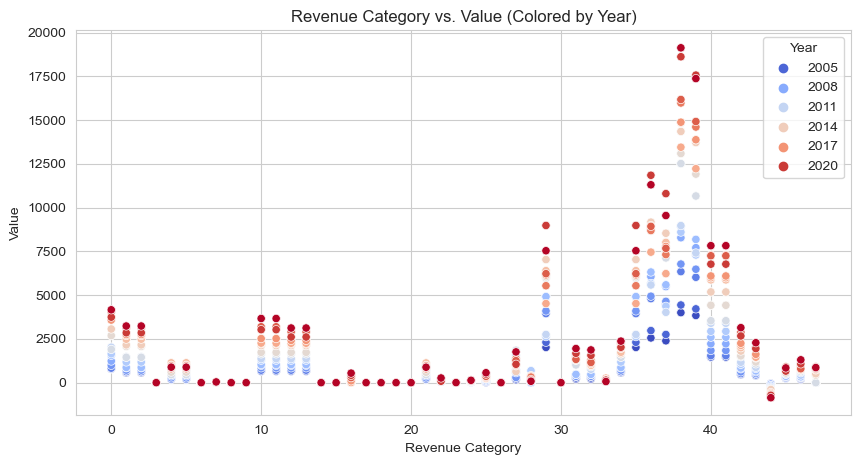

In [130]:
import matplotlib.pyplot as plt
# Scatter plot: Year vs. Value
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Year', y='Value', data=data, hue='Revenue category', palette='viridis')
plt.title('Year vs. Value (Colored by Revenue Category)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Revenue Category')
plt.show()

# Scatter plot: Revenue category vs. Value
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Revenue category', y='Value', data=data, hue='Year', palette='coolwarm')
plt.title('Revenue Category vs. Value (Colored by Year)')
plt.xlabel('Revenue Category')
plt.ylabel('Value')
plt.legend(title='Year')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


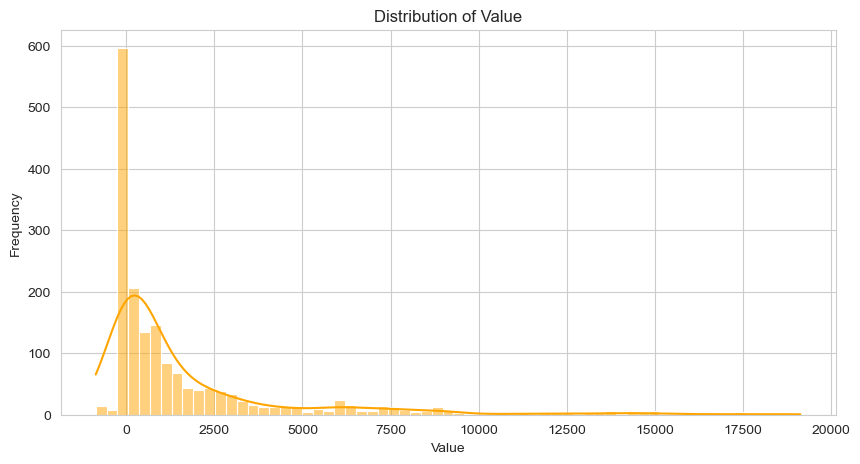

In [131]:
# Histogram: Distribution of Value
plt.figure(figsize=(10, 5))
sns.histplot(data['Value'], kde=True, color='orange')
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

C:\Users\USER\AppData\Local\Temp\ipykernel_3148\157830379.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Value'], shade=True, color='purple')
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


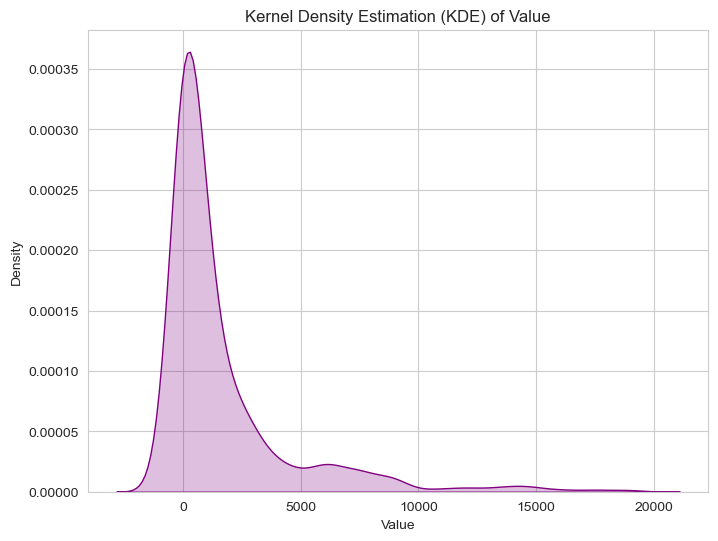

In [132]:
# KDE Plot: Kernel Density Estimation of Value
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Value'], shade=True, color='purple')
plt.title('Kernel Density Estimation (KDE) of Value')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show() 

C:\Users\USER\AppData\Local\Temp\ipykernel_3148\1500902311.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Value', data=data, estimator=np.mean, ci=None, palette='pastel')


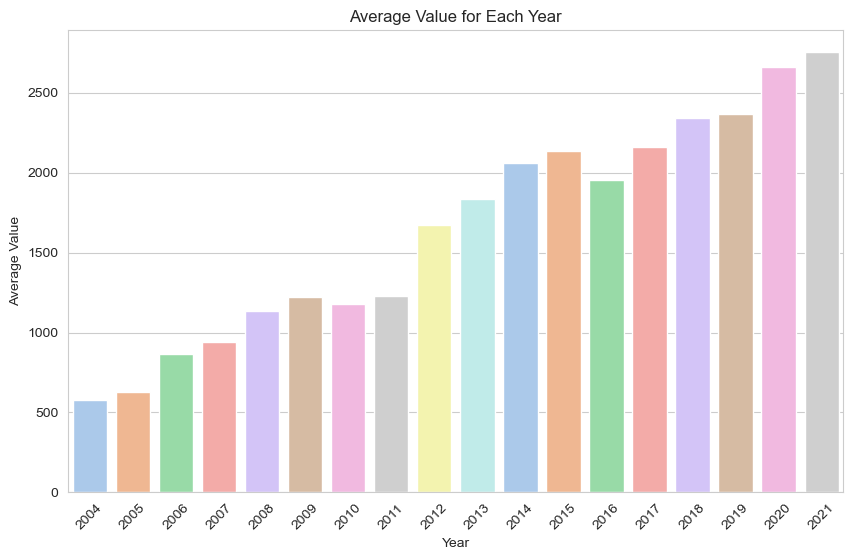

In [133]:
# Bar chart: Average value for each year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=data, estimator=np.mean, ci=None, palette='pastel')
plt.title('Average Value for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

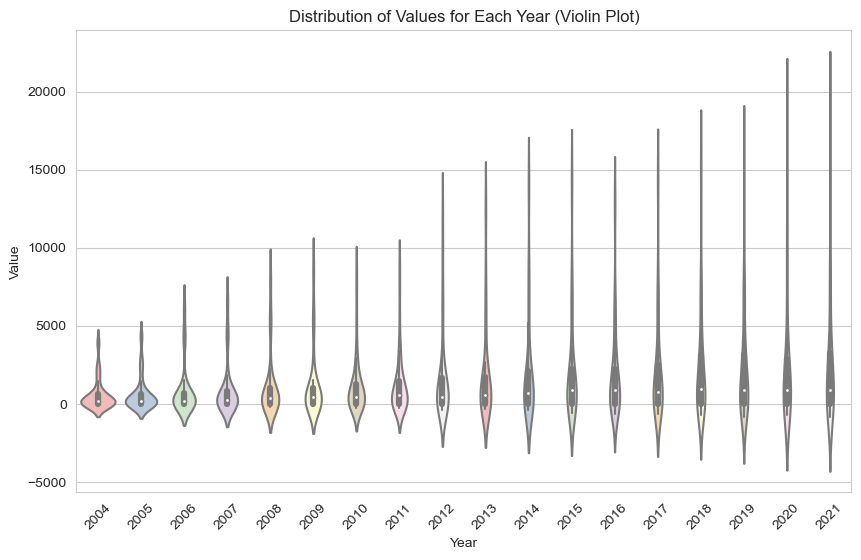

In [134]:
# Violin Plot: Distribution of values for each year
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='Value', data=data, palette='Pastel1')
plt.title('Distribution of Values for Each Year (Violin Plot)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


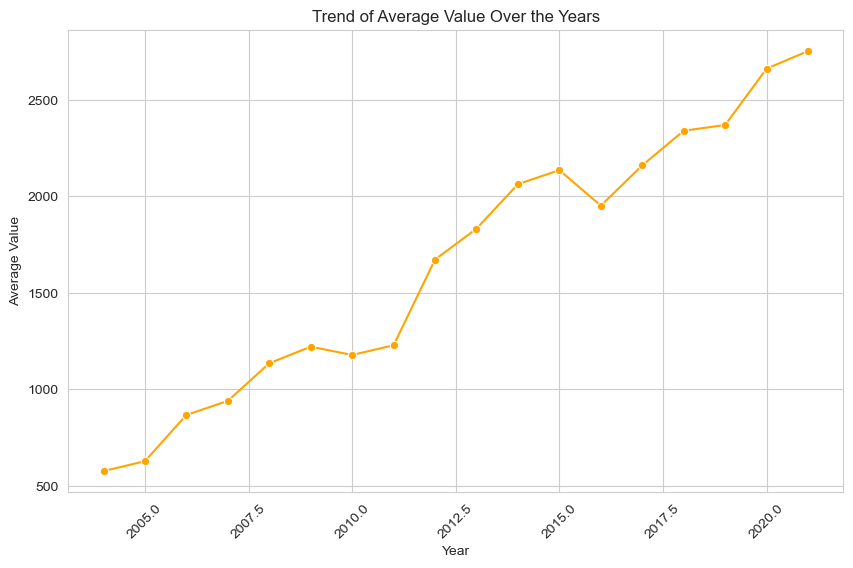

In [135]:
# Line Plot: Trend of average value over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=data.groupby('Year')['Value'].mean().reset_index(), marker='o', color='orange')
plt.title('Trend of Average Value Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show() 

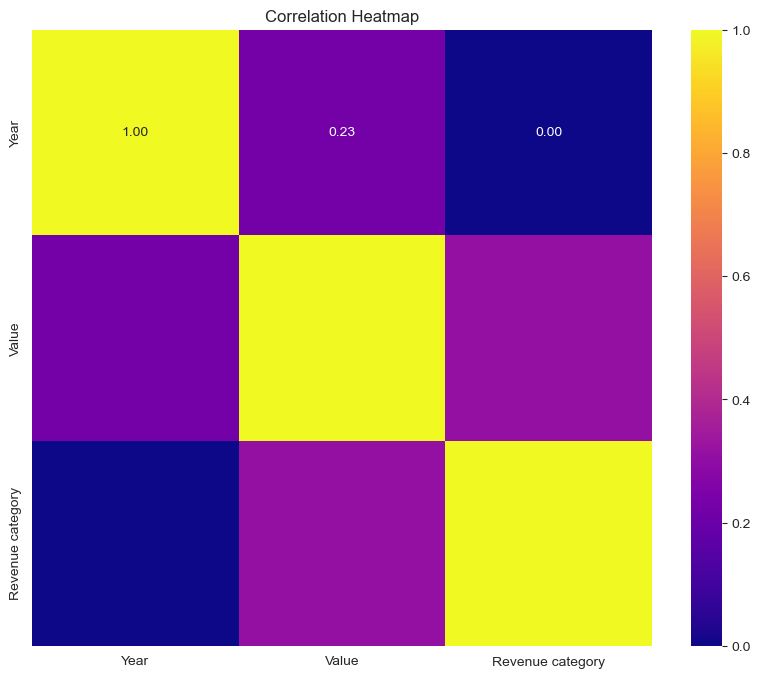

In [136]:
# Selecting numeric columns and 'Revenue category'
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_data['Revenue category'] = data['Revenue category']

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")  
plt.title('Correlation Heatmap')
plt.show()  

In [137]:
#Viewing data
print(data)

      Revenue category  Year     Value
0                   38  2004  4001.294
1                   38  2005  4437.224
2                   38  2006  6344.029
3                   38  2007  6775.955
4                   38  2008  8280.234
...                ...   ...       ...
1723                44  2017  -631.698
1724                44  2018  -681.585
1725                44  2019  -866.652
1726                44  2020  -722.489
1727                44  2021  -860.203

[1728 rows x 3 columns]


In [138]:
#Feature engineering

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Spliting our data into features (X) and target variable (y)
X = data[['Revenue category', 'Year']]
y = data['Value']

# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Doing Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [140]:
#Model training

In [141]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Defining the XGBoost regressor model
model = xgb.XGBRegressor()

# Training the XGBoost model
model.fit(X_train_pca, y_train)

# Making predictions on the test set
predictions = model.predict(X_test_pca)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 836113.9616151135
R-squared: 0.8970269229832877


In [142]:
#model Tuning

In [143]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Instantiating the XGBoost regressor model
model = xgb.XGBRegressor()

# Instantiating GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Performing grid search
grid_search.fit(X_train, y_train)

# Getting the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

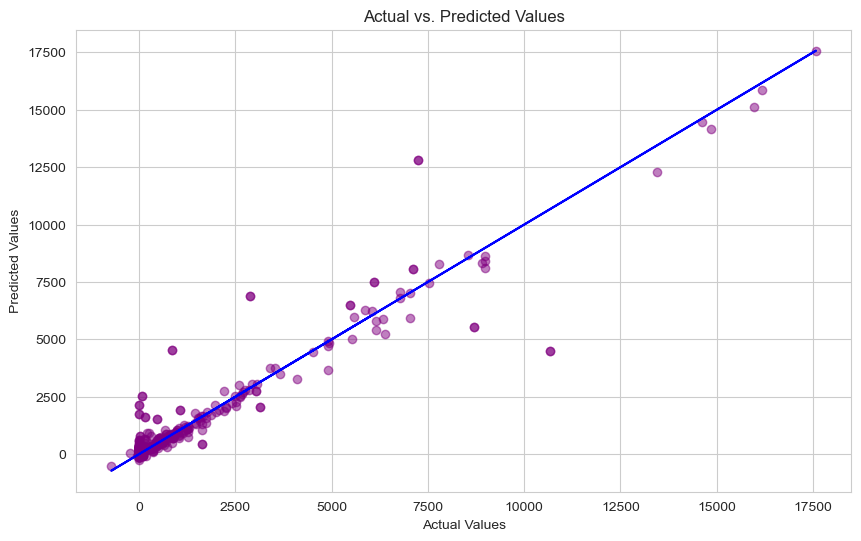

In [144]:
#model evaluation and validation

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the actual target values against the predicted values to visually inspect how well the model is predicting the target variable.
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=predictions, color='purple', alpha=0.5)
plt.plot(y_test, y_test, color='blue')  # Adding a diagonal line for comparison
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

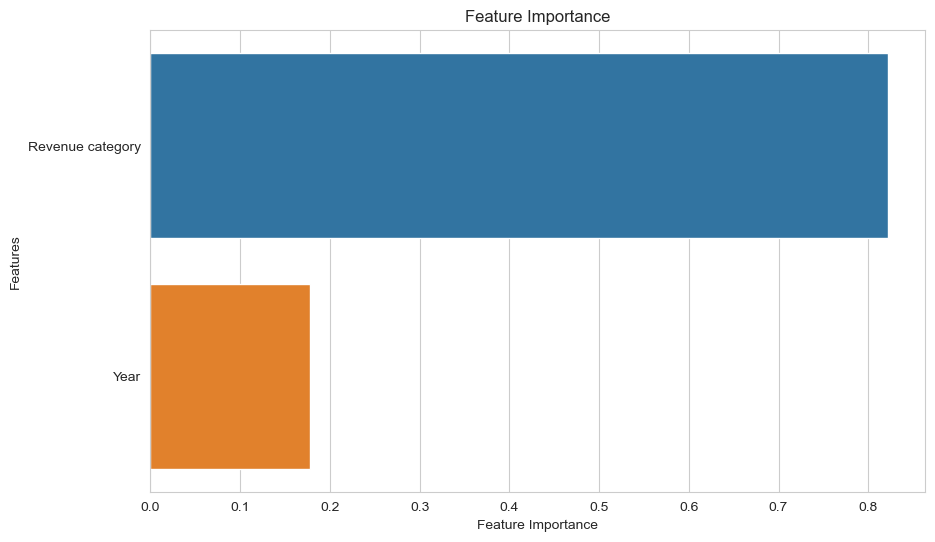

In [145]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train and y_train are our training data
# Instantiating the XGBoost regressor model
model = xgb.XGBRegressor()
# Training the model
model.fit(X_train, y_train)

# Accessing feature importances
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [146]:
# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean Cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.9938505  0.99420561 0.99396555 0.98861559 0.99749607]
Mean Cross-validation score: 0.9936266631059978


In [147]:
# Deployment - Save the model
import joblib

# Save the model to disk
filename = 'trained_model.sav'
joblib.dump(model, filename)
print("Model saved successfully.")

Model saved successfully.


In [148]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [149]:
#user Dashboard

In [151]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Function to make predictions
def predict_value():
    try:
        # Getting user input
        revenue_category = revenue_category_entry.get()
        year = int(year_entry.get())
        
        # Label encoding the revenue category
        revenue_category_encoded = label_encoder.transform([revenue_category])[0]
        
        # Creating a DataFrame with the user input
        input_data = pd.DataFrame({'Revenue category': [revenue_category_encoded], 'Year': [year]})
        
        # Ensuring that the input data has the same columns as the training data
        input_data_encoded = input_data.reindex(columns=X_train.columns, fill_value=0)
        
        # Making a prediction using the loaded model
        predicted_value = loaded_model.predict(input_data_encoded)
        
        # Displaying the predicted value
        messagebox.showinfo("Prediction Result", f"The predicted value is: {predicted_value[0]}")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Here we create the main application window
root = tk.Tk()
root.title("Revenue Prediction Dashboard")
root.geometry("600x300")  
root.configure(bg='sky blue')  

# Then loading the trained model
loaded_model = joblib.load('trained_model.sav')

# Creating labels and entry fields for user input
label_font = ("Arial", 12, "bold")
entry_font = ("Arial", 12)

revenue_category_label = tk.Label(root, text="Enter revenue category:", font=label_font, bg='#F0F0F0')
revenue_category_label.grid(row=0, column=0, padx=10, pady=5, sticky=tk.E)
revenue_category_entry = tk.Entry(root, font=entry_font)
revenue_category_entry.grid(row=0, column=1, padx=10, pady=5, sticky=tk.W+tk.E)

year_label = tk.Label(root, text="Enter a Year:", font=label_font, bg='#F0F0F0')
year_label.grid(row=1, column=0, padx=10, pady=5, sticky=tk.E)
year_entry = tk.Entry(root, font=entry_font)
year_entry.grid(row=1, column=1, padx=10, pady=5, sticky=tk.W+tk.E)

# Creating a button to trigger prediction
predict_button = tk.Button(root, text="Predict", font=label_font, bg='#4CAF50', fg='white', command=predict_value)
predict_button.grid(row=2, column=0, columnspan=2, pady=10)

# Centering all widgets
root.grid_rowconfigure(0, weight=1)
root.grid_rowconfigure(1, weight=1)
root.grid_rowconfigure(2, weight=1)
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=1)

# Starting the main event loop
root.mainloop()
